In [1]:
import pandas as pd
import numpy as np
student_df = pd.read_csv("https://aicore-files.s3.amazonaws.com/Data-Science/student_marks.tsv", delimiter="\t")
student_df = student_df.drop(["Student", "GPA"], axis=1)
student_df.columns = ["marks", "IQ", "study_hrs"]

sleep_hours = np.random.normal(7.5, 1.5, 50)
student_df["sleep_hrs"] = sleep_hours
student_df.head(10)

,marks,IQ,study_hrs,sleep_hrs
0,100,125,30,8.111242
1,95,104,40,6.880439
2,92,110,25,5.773516
3,90,105,20,6.687851
4,85,100,20,10.640201
5,80,100,20,6.999985
6,78,95,15,7.462984
7,75,95,10,6.542306
8,72,85,0,5.107072
9,65,90,5,5.876337


<Axes: >

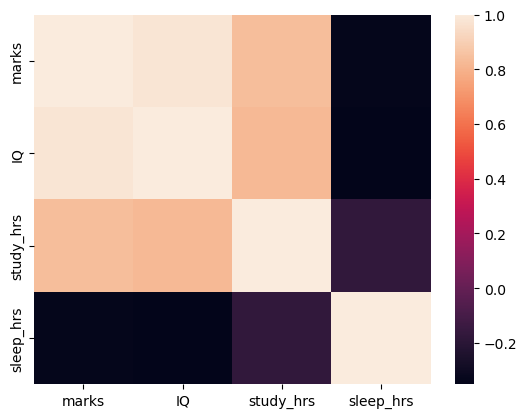

In [2]:
import seaborn as sns
sns.heatmap(student_df.corr())

In [3]:
import plotly.express as px
px.imshow(student_df.corr(), title="Correlation heatmap of student dataframe")

In [4]:
import statsmodels.formula.api as smf

## Fit a linear regression model to try and predict study_hrs from marks and IQ
model0 = smf.ols("study_hrs ~ marks + IQ", student_df).fit()
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              study_hrs   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     55.27
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           4.52e-13
Time:                        17:09:20   Log-Likelihood:                -155.29
No. Observations:                  50   AIC:                             316.6
Df Residuals:                      47   BIC:                             322.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.1155      3.318     -3.350      0.002     -17.791      -4.440
marks          0.3181      0.165      1.924      0.060      -0.015       0.651
IQ             0.0452      0.160      0.282      0.779      -0.277       0.368
==============================================================================
Omnibus:                        5.861   Durbin-Watson:                   1.672
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                6.724
Skew:                           0.329   Prob(JB):                       0.0347
Kurtosis:                       4.671   Cond. No.                         474.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
model1 = smf.ols("study_hrs ~ marks + IQ + sleep_hrs", student_df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              study_hrs   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     38.61
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           1.28e-12
Time:                        17:16:06   Log-Likelihood:                -154.09
No. Observations:                  50   AIC:                             316.2
Df Residuals:                      46   BIC:                             323.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.7164      6.012     -3.113      0.003     -30.817      -6.616
marks          0.3134      0.163      1.921      0.061      -0.015       0.642
IQ             0.0683      0.159      0.430      0.669      -0.251       0.388
sleep_hrs      0.8239      0.546      1.508      0.138      -0.276       1.924
==============================================================================
Omnibus:                        8.027   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                8.457
Skew:                           0.611   Prob(JB):                       0.0146
Kurtosis:                       4.602   Cond. No.                         875.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
## Code up three models which, in turn, model one of the exogenous variables against the other two.
exog_marks_model = smf.ols("marks ~ IQ + sleep_hrs", student_df).fit()
exog_iq_model = smf.ols("IQ ~ marks + sleep_hrs", student_df).fit()
exog_sleep_model = smf.ols("sleep_hrs ~ marks + IQ", student_df).fit()

## print the R^2 for each model
print("R^2 for model: \n Marks: {} \n IQ: {} \n Sleep: {}".format(exog_marks_model.rsquared, 
                                                                  exog_iq_model.rsquared, 
                                                                  exog_sleep_model.rsquared))

R^2 for model: 
 Marks: 0.956218407610277 
 IQ: 0.9566119464289525 
 Sleep: 0.12371096478911625


## Find collinearity
- VIF(Variation Inflation Factor)
- heatmap

In [7]:
## Code up a VIF function
def VIF(r2):
    return 1/(1-r2)

## Work out the VIF scores for each of the models
vif_marks = VIF(exog_marks_model.rsquared)
vif_iq = VIF(exog_iq_model.rsquared)
vif_sleep = VIF(exog_sleep_model.rsquared)

## print the VIF scores
print("VIF scores: \n Marks: {}, \n IQ: {} \n Sleep: {}".format(vif_marks, vif_iq, vif_sleep))

VIF scores: 
 Marks: 22.84064935552077, 
 IQ: 23.047818873979004 
 Sleep: 1.1411759816889007
